<a href="https://colab.research.google.com/github/EasonChen78/machine_learning/blob/main/20230410_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
((x_train, y_train), (x_test, y_test)) = mnist.load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


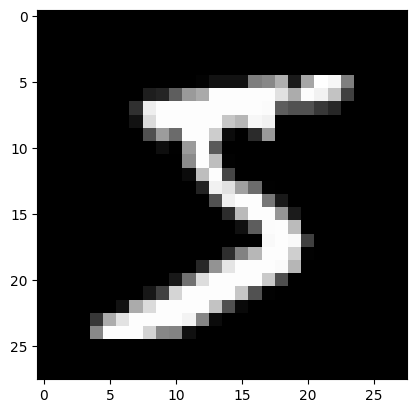

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    Dense(128, activation="sigmoid", input_dim=784),
    Dense(10, activation="sigmoid")
]

model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 指定loss採用交叉熵的 方法1
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])
# # 指定loss採用交叉熵的 方法2
# model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
x_train_norm = x_train.reshape(-1, 784)
x_test_norm = x_test.reshape(-1, 784)
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [9]:
model.fit(x_train_norm, y_train_cat, batch_size=100, epochs=40, validation_split=0.1)

Epoch 1/40
540/540 [==============================] - 4s 7ms/step - loss: 0.5671 - accuracy: 0.8453 - val_loss: 0.2587 - val_accuracy: 0.9255
Epoch 2/40
540/540 [==============================] - 4s 8ms/step - loss: 0.2933 - accuracy: 0.9135 - val_loss: 0.2229 - val_accuracy: 0.9360
Epoch 3/40
540/540 [==============================] - 5s 9ms/step - loss: 0.2527 - accuracy: 0.9247 - val_loss: 0.1968 - val_accuracy: 0.9432
Epoch 4/40
540/540 [==============================] - 4s 7ms/step - loss: 0.2282 - accuracy: 0.9312 - val_loss: 0.1750 - val_accuracy: 0.9472
Epoch 5/40
540/540 [==============================] - 3s 5ms/step - loss: 0.2108 - accuracy: 0.9358 - val_loss: 0.1717 - val_accuracy: 0.9495
Epoch 6/40
540/540 [==============================] - 2s 4ms/step - loss: 0.1990 - accuracy: 0.9391 - val_loss: 0.1604 - val_accuracy: 0.9518
Epoch 7/40
540/540 [==============================] - 3s 6ms/step - loss: 0.1870 - accuracy: 0.9432 - val_loss: 0.1612 - val_accuracy: 0.9530
Epoch 